Source: <br />
https://eduwiki.wmi.amu.edu.pl/s375666/umzcw18l/cwiczenia/, <br />
https://stackoverflow.com/a/23202269,  <br />https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba.

In [1]:
%load_ext pycodestyle_magic
%flake8_on --ignore E703
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all';

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from scipy import stats

In [3]:
df = pd.read_csv('train.tsv', sep='\t',
                 names=['price', 'rooms', 'meters', 'floor', 'adress', 'description'])

In [4]:
# df.price = df.price.map(lambda x: x * 1000)

In [5]:
# df.dtypes

In [6]:
df.corr()

,price,rooms,meters,floor
price,1.000000,0.090647,0.118515,-0.016787
rooms,0.090647,1.000000,0.781867,-0.039920
meters,0.118515,0.781867,1.000000,-0.084540
floor,-0.016787,-0.039920,-0.084540,1.000000


In [7]:
df.describe()

,price,rooms,meters,floor
count,4500.000000,4500.000000,4500.000000,4500.000000
mean,341.762805,2.457778,56.897742,2.963111
std,841.878242,0.923018,22.839026,2.467296
min,0.001000,1.000000,14.370000,1.000000
25%,239.000000,2.000000,42.215000,1.000000
50%,293.310500,2.000000,51.220000,2.000000
75%,355.441750,3.000000,65.000000,4.000000
max,36378.404000,10.000000,257.000000,16.000000


In [8]:
df_clr = df[['price', 'rooms', 'meters', 'floor']]

In [9]:
# df_clr.isna().sum()
# df_clr = df_clr.dropna()

In [10]:
df_clr.corr()

,price,rooms,meters,floor
price,1.000000,0.090647,0.118515,-0.016787
rooms,0.090647,1.000000,0.781867,-0.039920
meters,0.118515,0.781867,1.000000,-0.084540
floor,-0.016787,-0.039920,-0.084540,1.000000


In [11]:
df_clr_sd = df_clr[np.abs(df_clr - df_clr.mean()) <= 3*df_clr.std()]
# keep only the ones that are within +-3 standard deviations
# this will replace outliers with np.nan
df_clr_sd.isna().sum()
df_clr_sd = df_clr_sd.dropna()

price      4
rooms     15
meters    94
floor     88
dtype: int64

In [12]:
Q1 = df_clr.quantile(0.25)
Q3 = df_clr.quantile(0.75)
IQR = Q3 - Q1

df_clr_q = df_clr[~((df_clr < (Q1 - 1.5 * IQR)) | (df_clr > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
df_clr_sd.corr()

,price,rooms,meters,floor
price,1.000000,0.557780,0.726777,-0.086212
rooms,0.557780,1.000000,0.779660,-0.032378
meters,0.726777,0.779660,1.000000,-0.085380
floor,-0.086212,-0.032378,-0.085380,1.000000


In [14]:
df_clr_q.corr()

,price,rooms,meters,floor
price,1.000000,0.626089,0.756276,-0.021742
rooms,0.626089,1.000000,0.779447,-0.001823
meters,0.756276,0.779447,1.000000,-0.049104
floor,-0.021742,-0.001823,-0.049104,1.000000


In [15]:
df_clr_q.describe()

,price,rooms,meters,floor
count,3847.000000,3847.000000,3847.000000,3847.000000
mean,290.256777,2.319210,51.898082,2.599168
std,79.899015,0.800742,15.095228,1.741924
min,68.000000,1.000000,14.370000,1.000000
25%,233.000000,2.000000,40.630000,1.000000
50%,285.000000,2.000000,49.500000,2.000000
75%,339.000000,3.000000,62.000000,4.000000
max,530.000000,4.000000,99.000000,8.000000


In [16]:
df_clr_sd.describe()

,price,rooms,meters,floor
count,4311.000000,4311.000000,4311.000000,4311.000000
mean,311.412926,2.407330,54.916966,2.800510
std,121.691228,0.859602,18.906729,2.106582
min,0.001000,1.000000,14.370000,1.000000
25%,237.030000,2.000000,42.000000,1.000000
50%,290.000000,2.000000,50.800000,2.000000
75%,350.000000,3.000000,64.485000,4.000000
max,1790.000000,5.000000,125.400000,10.000000


In [17]:
df.describe()

,price,rooms,meters,floor
count,4500.000000,4500.000000,4500.000000,4500.000000
mean,341.762805,2.457778,56.897742,2.963111
std,841.878242,0.923018,22.839026,2.467296
min,0.001000,1.000000,14.370000,1.000000
25%,239.000000,2.000000,42.215000,1.000000
50%,293.310500,2.000000,51.220000,2.000000
75%,355.441750,3.000000,65.000000,4.000000
max,36378.404000,10.000000,257.000000,16.000000


In [18]:
df_clr_sd.price.mean()
df_clr_sd.price.max()
df_clr_sd.price.min()
df_clr_sd.price.sum()

311.41292646717699

1790.0

0.001

1342501.1259999999

In [19]:
df.price.mean()
df.price.max()
df.price.min()

341.76280533333335

36378.404000000002

0.001

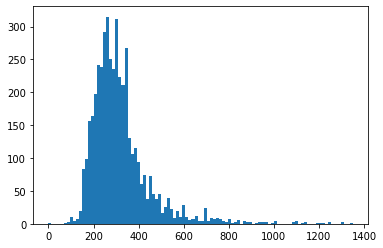

In [20]:
df_clr_m = df[df.price < 1500]
x = df_clr_m['price']
plt.hist(x, bins=100)
plt.show();

In [21]:
df[df.price > 1500].describe()

,price,rooms,meters,floor
count,7.000000,7.000000,7.000000,7.000000
mean,15080.160571,3.000000,98.485714,2.428571
std,16254.534776,1.632993,63.729582,1.397276
min,1539.000000,1.000000,31.520000,1.000000
25%,1690.500000,2.000000,51.550000,1.000000
50%,3740.000000,3.000000,100.000000,3.000000
75%,30261.360000,3.500000,117.500000,3.500000
max,36378.404000,6.000000,219.780000,4.000000


In [22]:
df.describe()
df.info()

,price,rooms,meters,floor
count,4500.000000,4500.000000,4500.000000,4500.000000
mean,341.762805,2.457778,56.897742,2.963111
std,841.878242,0.923018,22.839026,2.467296
min,0.001000,1.000000,14.370000,1.000000
25%,239.000000,2.000000,42.215000,1.000000
50%,293.310500,2.000000,51.220000,2.000000
75%,355.441750,3.000000,65.000000,4.000000
max,36378.404000,10.000000,257.000000,16.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
price          4500 non-null float64
rooms          4500 non-null int64
meters         4500 non-null float64
floor          4500 non-null int64
adress         4500 non-null object
description    4500 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 211.0+ KB


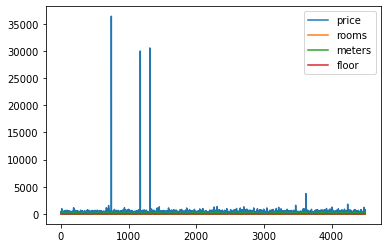

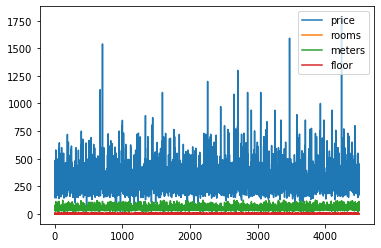

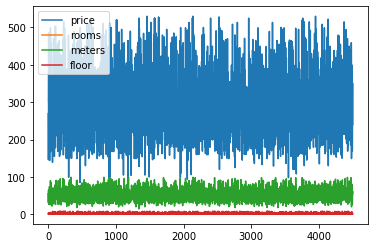

In [23]:
df.plot()
plt.show();
df_clr_sd.plot()
plt.show();
df_clr_q.plot()
plt.show();

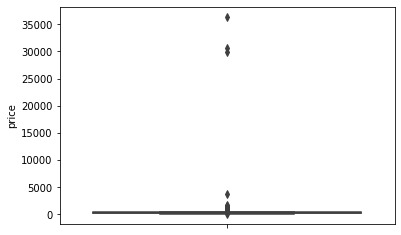

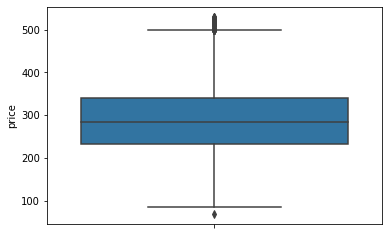

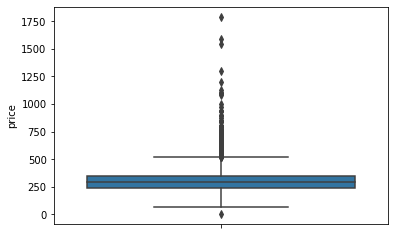

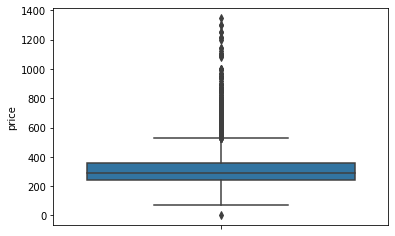

In [24]:
sns.boxplot(y='price', data=df)
plt.show();
sns.boxplot(y='price', data=df_clr_q)
plt.show();
sns.boxplot(y='price', data=df_clr_sd)
plt.show();
sns.boxplot(y='price', data=df_clr_m)
plt.show();

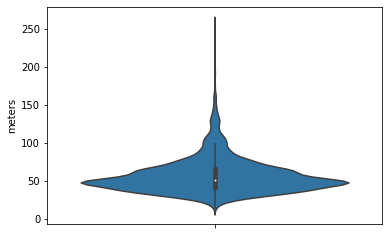

In [25]:
sns.violinplot(y='meters', data=df_clr)
plt.show();

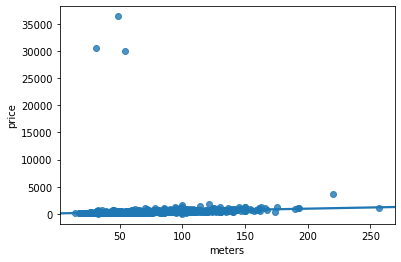

In [26]:
sns.regplot(y=df_clr['price'], x=df_clr['meters'])
plt.show();

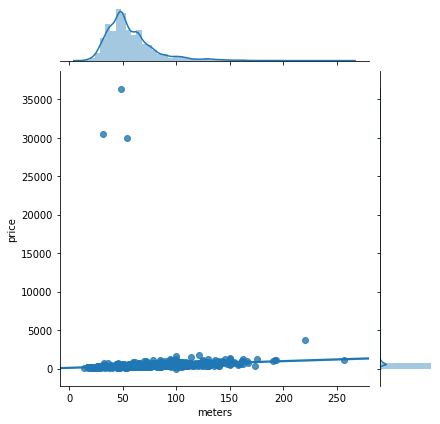

In [27]:
sns.jointplot(x='meters', y='price', data=df_clr, kind='reg')
plt.show();

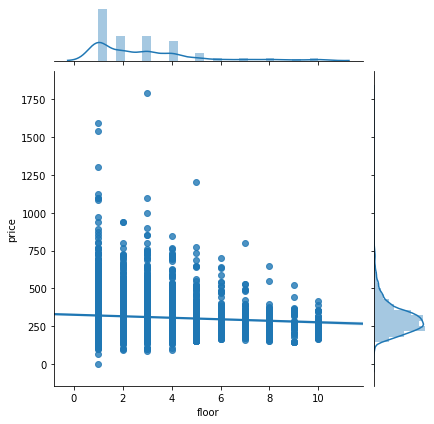

In [28]:
sns.jointplot(x='floor', y='price', data=df_clr_sd, kind='reg')
plt.show();


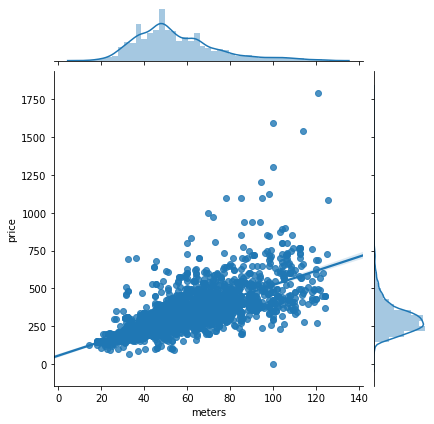

In [29]:
sns.jointplot(x='meters', y='price', data=df_clr_sd, kind='reg')
plt.show();

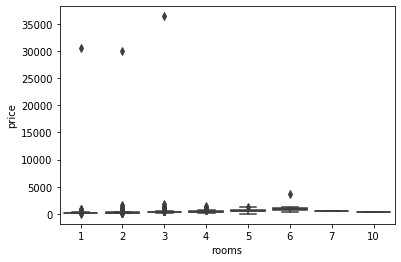

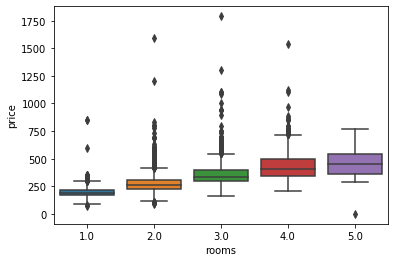

In [30]:
sns.boxplot(y='price', x='rooms', data=df_clr)
plt.show();
sns.boxplot(y='price', x='rooms', data=df_clr_sd)
plt.show();

In [31]:
reg = linear_model.LinearRegression()
reg.fit(df_clr[['meters']], df_clr['price']);

In [32]:
reg.predict([[2]])
reg.predict([[40]])
reg.predict([[4]])

array([ 101.93419184])

array([ 267.94260938])

array([ 110.67147697])

In [33]:
reg = linear_model.LinearRegression()
reg.fit(df_clr[['meters', 'rooms']], df_clr['price']);

In [34]:
reg.coef_

array([ 4.51816724, -4.73203131])

In [35]:
reg.predict(df_clr[['meters', 'rooms']])

array([ 330.62267606,  439.05868985,  232.59954001, ...,  718.75733068,
        366.98187806,  335.35470737])